3 раза разными способами получить на задаче классификации значение f1 выше 0.91 для методов на sklearn и выше 0.52 для методов на pytorch.

Предварительно про PyTorch:
* [Про тензоры в pytorch](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/tensor_tutorial.ipynb)
* [Про автоматическое дифференцирование и что такое .backwards()](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/autograd_tutorial.ipynb)
* [Очень простая нейронка на pytorch](https://colab.research.google.com/drive/1RsZvw4KBGn5U5Aj5Ak7OG2pHx6z1OSlF)

# Классификация текстов

## Fakenews

1. Мы будем работать с данными fakenews отсюда: https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Train.csv
2. Проведите препроцессинг текста. Разбейте данные на train и test для задачи классификации.
3. Векторизуйте.
4. Обучите на полученных векторах алгоритм классификации.


word2vec official tutorial: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
https://github.com/RaRe-Technologies/gensim-data#models - здесь можно скачать предобученные модели


## Load data

In [ ]:
!wget https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Train.csv

--2023-09-06 16:39:03--  https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1253562 (1.2M) [text/plain]
Saving to: ‘Constraint_Train.csv’

Constraint_Train.cs 100%[===================>]   1.20M  --.-KB/s    in 0.04s   

2023-09-06 16:39:04 (29.0 MB/s) - ‘Constraint_Train.csv’ saved [1253562/1253562]



In [ ]:
import os
import pandas as pd
import numpy as np


TEST_SPLIT_SIZE = 0.33

In [ ]:
# df = pd.read_csv('Constraint_Train.csv')
try:
    import google.colab
    df = pd.read_csv('/content/Constraint_Train.csv')
    import nltk
    nltk.download('stopwords')
    nltk.download('punkt')
    COLAB = True
except:
    from beholder import print_methods
    df = pd.read_csv("/Users/velo1/SynologyDrive/GIT_syno/data/NLP/Constraint_Train.csv")
    COLAB = False

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


## ```Naive``` (sklearn vectorizer) methods for classification

In [ ]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from tqdm import tqdm
import nltk
from string import punctuation

# nltk.download('punkt')
# nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words("english")

### ``word2vec``
A. vectorizing with word2vec based on fakenews corpora  

B. vectorizing with word2vec based on pre-trained model

### Tokenization of tweets

In [ ]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# tokenize the sentences using nltk.tokenize.word_tokenize
sentences = [
    TreebankWordTokenizer().tokenize(text=text.lower())
    for text in df.tweet
    if text not in punctuation
]
print(df.loc[0, "tweet"])
print(sentences[0])  # first sentence token

The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.
['the', 'cdc', 'currently', 'reports', '99031', 'deaths.', 'in', 'general', 'the', 'discrepancies', 'in', 'death', 'counts', 'between', 'different', 'sources', 'are', 'small', 'and', 'explicable.', 'the', 'death', 'toll', 'stands', 'at', 'roughly', '100000', 'people', 'today', '.']


In [ ]:
len(df.loc[0, "tweet"].split()), len(sentences[0])

(29, 30)

### Vectorization of tweets with word2vec model

In [ ]:
from gensim.models.word2vec import Word2Vec

# train the word2vec model on the corpus
model_tweets = Word2Vec(
    sentences, workers=4, vector_size=300, min_count=3, window=7, epochs=15
)
print(
    len(model_tweets.wv.key_to_index)
)  # print out the number of unique words in the vocabulary

5534


In [ ]:
# print out the often used methods of the w2v model
print([meth for meth in dir(model_tweets.wv) if not meth.startswith("_")])

['add_lifecycle_event', 'add_vector', 'add_vectors', 'allocate_vecattrs', 'closer_than', 'cosine_similarities', 'distance', 'distances', 'doesnt_match', 'evaluate_word_analogies', 'evaluate_word_pairs', 'expandos', 'fill_norms', 'get_index', 'get_mean_vector', 'get_normed_vectors', 'get_vecattr', 'get_vector', 'has_index_for', 'index2entity', 'index2word', 'index_to_key', 'init_sims', 'intersect_word2vec_format', 'key_to_index', 'load', 'load_word2vec_format', 'log_accuracy', 'log_evaluate_word_pairs', 'mapfile_path', 'most_similar', 'most_similar_cosmul', 'most_similar_to_given', 'n_similarity', 'next_index', 'norms', 'rank', 'rank_by_centrality', 'relative_cosine_similarity', 'resize_vectors', 'save', 'save_word2vec_format', 'set_vecattr', 'similar_by_key', 'similar_by_vector', 'similar_by_word', 'similarity', 'similarity_unseen_docs', 'sort_by_descending_frequency', 'unit_normalize_all', 'vector_size', 'vectors', 'vectors_for_all', 'vectors_lockf', 'vectors_norm', 'vocab', 'wmdistan

In [ ]:
def check_similarity(model, word) -> list:
    """Check the similarity of the word with the words in the vocabulary
    Args:
        model: gensim.models.word2vec.Word2Vec
        word: str
    Returns:
        list of tuples (word, similarity)
    """
    if hasattr(model, "wv"):
        try:
            return model.wv.most_similar(word)
        except KeyError:
            print(f"Word {word} is not in a vocabulary")
            return list()
    else:
        try:
            return model.most_similar(word)
        except KeyError:
            print(f"Word {word} is not in a vocabulary")
            return list()

In [ ]:
check_similarity(model_tweets, "covid")

[('corona', 0.6087474822998047),
 ('done.', 0.5820356607437134),
 ('coronavirus', 0.5296990871429443),
 ('u', 0.5094467401504517),
 ('liquid', 0.49752095341682434),
 ('moderna', 0.48310214281082153),
 ('deadly', 0.48059484362602234),
 (',', 0.47637826204299927),
 ('covid.', 0.47364217042922974),
 ('bacteria', 0.47092533111572266)]

In [ ]:
# print_methods(model_tweets)

In [ ]:
model_tweets.wv.most_similar("vaccine")

[('cure', 0.7838325500488281),
 ('drug', 0.7821235656738281),
 ('developed', 0.774448037147522),
 ('scientists', 0.7422436475753784),
 ('company', 0.7421199083328247),
 ('fight', 0.7396377921104431),
 ('remedy', 0.7350128889083862),
 ('eradicate', 0.7237803936004639),
 ('against', 0.7186787128448486),
 ('created', 0.7168167233467102)]

In [ ]:
# model_tweets.init_sims() # Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary

In [ ]:
def get_aggregated_embedding(tweet: list, model, dimension=300) -> np.array:
    """Retrieve aggregated (summing) embedding of a text.
    Args:
        tweet (list): A list of words.
        model: gensim.models.word2vec.Word2Vec
        dimension (int): The dimension of the word embedding.
    Returns:
        np.array: A vector of size 'dimension' containing the aggregated text embedding.
    """
    result = []
    for word in tweet:
        # check if model has method wv (word2vec) or not (glove)
        if hasattr(model, "wv"):
            # check if word is in vocabulary
            if word in model.wv:
                result.append(model.wv[word])
            else:
                result.append(np.zeros(dimension))
        else:
            # check if word is in vocabulary
            if word in model:
                result.append(model[word])
            else:
                result.append(np.zeros(dimension))

    if len(result):
        result = np.sum(
            result, axis=0
        )  # sum of word embeddings in one tweet (aggregation)
    else:
        result = np.zeros(dimension)  # zero vector if no words found in model
    return result

In [ ]:
features = [
    get_aggregated_embedding(tweet=tweet, model=model_tweets, dimension=300)
    for tweet in sentences
]

In [ ]:
features[0].shape  # 300 is the dimension of the word2vec model

(300,)

In [ ]:
# Check for presence of zero vectors in features (if no words found in model)
num_zero_vectors = np.sum(np.all(features == 0, axis=0))
print(f"Number of zero vectors: {num_zero_vectors} in features")

Number of zero vectors: 0 in features


### Classification with LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# features hear is a list of vectors of size 300 (aggregated word embeddings) for each tweet
print(
    f"Number of features: {len(features)}, shape of each feature: {features[0].shape}"
)

X_train, X_test, y_train, y_test = train_test_split(
    features, df.label, test_size=TEST_SPLIT_SIZE, random_state=42
)

Number of features: 6420, shape of each feature: (300,)


In [ ]:
model_lr = LogisticRegression(
    max_iter=2000,
    random_state=42,
)
model_lr.fit(X_train, y_train)

predicted = model_lr.predict(X_test)
print(classification_report(y_test, predicted, digits=3))

              precision    recall  f1-score   support

        fake      0.923     0.912     0.918      1004
        real      0.922     0.932     0.927      1115

    accuracy                          0.923      2119
   macro avg      0.923     0.922     0.922      2119
weighted avg      0.923     0.923     0.923      2119



### Classification with Random Forest

In [ ]:
# simple tokenizer
text_rfc = [TreebankWordTokenizer().tokenize(text=text.lower()) for text in df.tweet]

# train the word2vec model on the corpus
model_tweets_rfc = Word2Vec(
    text_rfc, workers=4, vector_size=300, min_count=3, window=31, epochs=15
)

# vectorization
features_rfc = [
    get_aggregated_embedding(tweet=tweet, model=model_tweets_rfc, dimension=300)
    for tweet in text_rfc
]

print(
    len(model_tweets_rfc.wv.key_to_index)
)  # print out the number of unique words in the vocabulary
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    features_rfc, df.label, test_size=TEST_SPLIT_SIZE, random_state=42
)

model_rf = RandomForestClassifier(
    n_estimators=100, random_state=42, n_jobs=-1, verbose=0)
model_rf.fit(X_train, y_train)

predicted = model_rf.predict(X_test)
print(classification_report(y_test, predicted, digits=3))


5534
              precision    recall  f1-score   support

        fake      0.946     0.919     0.932      1004
        real      0.929     0.952     0.941      1115

    accuracy                          0.937      2119
   macro avg      0.937     0.936     0.936      2119
weighted avg      0.937     0.937     0.937      2119



## let's use `pre-trained` models for vectorizing

In [ ]:
import gensim.downloader as api
from gensim.models import KeyedVectors  # for loading word2vec model from file


# download pretrained word2vec model from gensim-data
# print(api.load("glove-wiki-gigaword-300", return_path=True))  # output: /home/user/gensim-data/glove-twitter-25/glove-twitter-25.gz

### The same steps as above but with pre-trained model:
1. Download pre-trained model from local file
2. Vectorize tweets with pre-trained model
3. Classification with LogisticRegression
4. Print classification report

In [ ]:
models = ["glove-twitter-25", "glove-twitter-50", "glove-wiki-gigaword-300"]
results = {}

for model_name in models:
    if COLAB:
        pretr_model = api.load(model_name)

    else:
        # construct local path to the model
        path = "/Users/velo1/gensim-data/" + model_name + "/" + model_name + ".gz"
        pretr_model = KeyedVectors.load_word2vec_format(path, binary=False)
        msg = f"Loaded model {model_name}"
        print(msg)
        os.system(f"Say {msg}")

    dimension = pretr_model.vector_size
    vocab_size = len(pretr_model.key_to_index)
    # define features (embeddings) for each tweet
    features2 = [
        get_aggregated_embedding(tweet=tweet, model=pretr_model, dimension=dimension)
        for tweet in sentences
    ]
    X_train, X_test, y_train, y_test = train_test_split(
        features2, df.label, test_size=TEST_SPLIT_SIZE, random_state=42
    )
    # train logistic regression model
    model_lr = LogisticRegression(max_iter=2000, random_state=42)
    model_lr.fit(X_train, y_train)
    predicted = model_lr.predict(X_test)

    check_similarity(pretr_model, "covid")
    results[model_name] = [
        classification_report(y_test, predicted, output_dict=True, digits=3)["macro avg"]["f1-score"],
        vocab_size,
        dimension,
    ]

[==================================================] 100.0% 104.8/104.8MB downloaded
Word covid is not in a vocabulary
[==================================================] 100.0% 199.5/199.5MB downloaded
Word covid is not in a vocabulary
[=================================================-] 99.6% 374.4/376.1MB downloaded
Word covid is not in a vocabulary


Some takeaways on ``pre-tained models`` for word2vec:  

The Glove model is trained on the non-contextualized word vectors.  
It is trained on the aggregated global word-word co-occurrence statistics from a corpus,  
and the resulting representations showcase interesting linear substructures of the word vector space.  
The Glove model is trained on the Wikipedia 2014 + Gigaword 5 dataset,  
which contains 6 billion tokens and 400 thousand vocabularies.  
The dimension of the word vector is 300.  

But the fact it was published in 2014 makes it a bit outdated.  
So `covid` is not in the vocabulary.

### The results summary of classification with pre-trained model

In [ ]:
for key, value in results.items():
    print(
        f"Model {key:<30}: macro avg f1-score {value[0]:.3f}, vocab size {value[1]}, dimension {value[2]}"
    )

Model glove-twitter-25              : macro avg f1-score 0.835, vocab size 1193514, dimension 25
Model glove-twitter-50              : macro avg f1-score 0.854, vocab size 1193514, dimension 50
Model glove-wiki-gigaword-300       : macro avg f1-score 0.903, vocab size 400000, dimension 300


#### The more is the dimension of the vector, the better is the result of classification (f1-score)
#### despite the lower number of words in the vocabulary (three times less).

In [ ]:
from tabulate import tabulate

data = list(
    zip(pretr_model.most_similar("vaccine"), model_tweets.wv.most_similar("vaccine"))
)

# Print the table
print(
    "Compare the most similar words from pretrained Glove model\n"
    "and model trained on tweets  for the word 'vaccine':\n"
)
print(tabulate(data, headers=["Pretrained Glove Model", "Model from Tweets"]))

Compare the most similar words from pretrained Glove model
and model trained on tweets  for the word 'vaccine':

Pretrained Glove Model                Model from Tweets
------------------------------------  ----------------------------------
('vaccines', 0.849010169506073)       ('cure', 0.7838325500488281)
('flu', 0.6364811062812805)           ('drug', 0.7821235656738281)
('vaccination', 0.6324456334114075)   ('developed', 0.774448037147522)
('doses', 0.6266157031059265)         ('scientists', 0.7422436475753784)
('influenza', 0.6076477766036987)     ('company', 0.7421199083328247)
('smallpox', 0.6020570993423462)      ('fight', 0.7396377921104431)
('polio', 0.587674617767334)          ('remedy', 0.7350128889083862)
('vaccinations', 0.5871402025222778)  ('eradicate', 0.7237803936004639)
('virus', 0.5832216143608093)         ('against', 0.7186787128448486)
('measles', 0.5729112029075623)       ('created', 0.7168167233467102)


Pretrained model with vectors of dimension 300 performs vectorisation as good as  
custom models trained on fakenews corpora with vectors of dimension 300.

###  Let's try to use one more ```counting vectorizer```

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

for data in [df.tweet, ["".join(word) for word in sentences]]:
    # print(f'Using data: {data}')
    vec = CountVectorizer()  # simple count vectorizer
    bow = vec.fit_transform(data)  # document-term matrix (bag of words)
    print(f"Vocabulary size: {len(vec.vocabulary_)}")
    X_train, X_test, y_train, y_test = train_test_split(
        bow, df.label, test_size=TEST_SPLIT_SIZE, random_state=42
    )

    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_train, y_train)

    predicted = model.predict(X_test)
    print(classification_report(y_test, predicted, digits=3))

Vocabulary size: 18385
              precision    recall  f1-score   support

        fake      0.914     0.926     0.920      1004
        real      0.933     0.921     0.927      1115

    accuracy                          0.924      2119
   macro avg      0.923     0.924     0.923      2119
weighted avg      0.924     0.924     0.924      2119

Vocabulary size: 25796
              precision    recall  f1-score   support

        fake      0.786     0.853     0.818      1004
        real      0.856     0.791     0.822      1115

    accuracy                          0.820      2119
   macro avg      0.821     0.822     0.820      2119
weighted avg      0.823     0.820     0.820      2119



Despite of greater vocabulary size CountVectorizer based on TreebankTokenizer   
performs worse than
CountVectorizer based on raw text.

### Let's try tf-idf vectorizer

In [ ]:
# import tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# define vectorizer
vec = TfidfVectorizer(lowercase=True, stop_words="english", ngram_range=(1, 2))
# vec = TfidfVectorizer(lowercase=False,  ngram_range=(1, 1))
# fit vectorizer on data
tfidf = vec.fit_transform(df.tweet)

X_train, X_test, y_train, y_test = train_test_split(
    tfidf, df.label, test_size=TEST_SPLIT_SIZE, random_state=42
)
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train, y_train)

predicted = model.predict(X_test)
print(classification_report(y_test, predicted, digits=3))

              precision    recall  f1-score   support

        fake      0.889     0.941     0.914      1004
        real      0.944     0.894     0.918      1115

    accuracy                          0.916      2119
   macro avg      0.917     0.918     0.916      2119
weighted avg      0.918     0.916     0.917      2119



With tfidf vectorizer based on raw text (unigrams without lowercasing) we get the results of classification  
slioghtly better than on bigrams with lowercasing.  
Interesting fact so far.  
Maybe some punctuation marks are important for classification!!!

## RNN for classification

### PyTorch + LSTM

We need to transform labels (fake / real ) to numbers (0 / 1)


In [ ]:
labels = (df.label == "real").astype(int).to_list()  # 1 for real, 0 for fake
labels[:10], len(labels)

([1, 1, 0, 1, 1, 1, 1, 0, 0, 0], 6420)

#### Limit the number of words in one tweet

In [ ]:
max_len = len(max(df.tweet, key=len))  # max length of tokenized tweet

# find index of token with max length in sentences (list of tokenized tweets)
# max_index = sentences.index(
#     max(sentences, key=len)
# )  # index of longest tweet in token_lists

max_len = len(max(df.tweet, key=len))  # max length of tokenized tweet

# find index of token with max length in df.tweet
max_index = df.tweet.apply(len).idxmax()  # index of longest tweet in token_lists

print(
    f"The max number of tokens (words) in one tweet: {max_len}"
)  # max length of tokenized tweet (number of tokens (words) in longest tweet)
print(
    f'The number of words in the longest tweet: {len(df.loc[max_index, "tweet"].split())}'
)  # number of words in longest tweet
# find index of token with max length

print(f"Index of the longest tweet: {max_index}")
# print(f'\nThe longest tweet:\n{df.loc[max_index, "tweet"]}')

The max number of tokens (words) in one tweet: 8846
The number of words in the longest tweet: 1456
Index of the longest tweet: 270


1456 words in one tweet is too much for LSTM

What is the frequency distribution of the number of words in tweets?

In [ ]:
try:
    from collections import Counter
except:
    !python -m pip install collections
    from collections import Counter

fd = Counter(
    [len(word_tokenize(tokens)) for tokens in df.tweet]
)  # frequency distribution of tweet lengths
len(fd.values())  # number of unique tweet lengths

94

In [ ]:
fd.most_common(10)  # 10 most common tweet lengths

[(20, 177),
 (25, 174),
 (22, 170),
 (18, 170),
 (19, 168),
 (21, 168),
 (17, 164),
 (15, 161),
 (16, 161),
 (23, 156)]

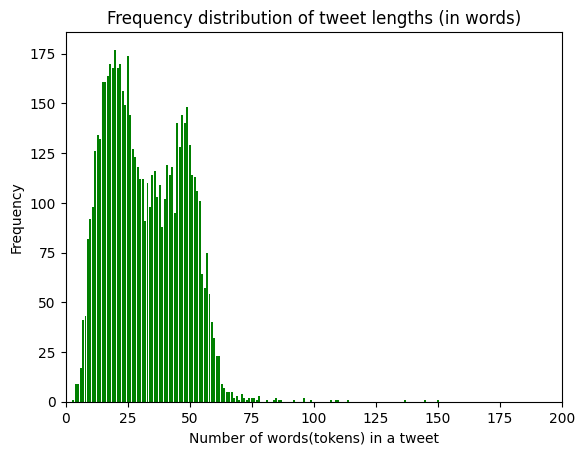

In [ ]:
# fd.most_common(10)   # 10 most common tweet lengths in tokens
import matplotlib.pyplot as plt

plt.bar(list(fd.keys()), list(fd.values()), color="g")
plt.xlim(0, 200)
plt.title("Frequency distribution of tweet lengths (in words)")
plt.xlabel("Number of words(tokens) in a tweet")
plt.ylabel("Frequency")
plt.show()

Зададим максимум 200 слов в 1 твите.

Возьмём те же w2v эмбеддинги.

In [ ]:
def get_word_embedding(tokens: list, max_words=200) -> np.array:
    """Retrieve the word embedding of a list of tokens limited by max_len of words.
    Args:
        tokens (list): A list of tokens.
        max_words (int): The maximum length of the list of tokens.
    Returns:
        np.array: A matrix of size (max_words, 300) containing the word embeddings.
    """
    result = []
    for i in range(max_words):  # iterate through the indices (limited by max_len)
        if i < len(
            tokens
        ):  # get the embedding of the word if the index is less than the length of the tweet
            word = tokens[i]
            if word in model_tweets.wv:
                result.append(
                    model_tweets.wv[word]
                )  # append the word embedding to the result
            else:
                result.append(
                    np.zeros(300)
                )  # zero vector if word not found in model, 300 is the embedding size
        else:  # if index is greater than the length of the tweet
            result.append(
                np.zeros(300)
            )  # pad with zero vectors if index is greater than the length of the tweet
    return result


emb = get_word_embedding(sentences[0], max_words=200)  # first tweet, first 10 words
print(
    f"Number of words in the first tweet: {len(sentences[0])}, embedding shape: {np.array(emb).shape}"
)

Number of words in the first tweet: 30, embedding shape: (200, 300)


In [ ]:
# token_lists - list of lists (tokenized tweets)
features_2d = [get_word_embedding(text, max_words=200) for text in sentences]
print(np.array(features_2d).shape)


X_train, X_test, y_train, y_test = train_test_split(
    features_2d, labels, test_size=TEST_SPLIT_SIZE, random_state=42
)

(6420, 200, 300)


In [ ]:
import torch
import torch.nn as nn  # neural network module
import torch.optim as optim  # optimization module

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
len(X_train)  # the number of training samples

4301

## [LSTM](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html?highlight=lstm#torch.nn.LSTM)

In [ ]:
import torch
import torch.nn as nn


class LSTMClassifier(nn.Module):
    def __init__(
        self,
        input_size,
        hidden_dim,
        seq_len,
        output_size,
        n_layers=2,
        drop_prob=0.2,
    ):
        super(LSTMClassifier, self).__init__()

        self.n_layers = n_layers
        self.output_size = output_size
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(
            input_size, hidden_dim, n_layers, dropout=drop_prob, batch_first=True
        )
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, hidden):
        # x: Input tensor of shape (batch_size, seq_len, input_size)
        batch_size = x.shape[0]

        # check if previous hidden state is of the same size as the current batch size
        if hidden[0].shape[1] != batch_size:
            hidden = self.init_hidden(hidden[0].shape[1])


        lstm_out, hidden = self.lstm(x, hidden) # lstm_out: tensor of shape (batch_size, seq_len, hidden_size)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sigmoid(out)

        out = out.view(batch_size, -1)  # reshape to be batch_size first

        # out = out[:, -1]    # get the last output for the sequence
        out = out.mean(1) # we do not accent on the sequence but on semantics, so mean the vector!
        return out, hidden


    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
            weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        )
        return hidden



seq_len = 200  # Sequence length (max number of words in a tweet)
input_size = 300  # Assuming input size is 300 (embedding size)
hidden_dim = 200  # Number of hidden units in LSTM layer
output_size = 1  # Output size for binary classification

lstm_model = LSTMClassifier(
    input_size=input_size,
    hidden_dim=hidden_dim,
    seq_len=seq_len,
    output_size=output_size,
)
lstm_model.to(device)
print(lstm_model)

LSTMClassifier(
  (lstm): LSTM(300, 200, num_layers=2, batch_first=True, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=200, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


### Obtain tensors for train and test

In [ ]:
# in_data = torch.tensor(X_train).float() # converting list to tensor can be extremely slow
in_data = torch.tensor(
    np.array(X_train)
).float()  # converting list to numpy array and then to tensor is much faster
targets = torch.tensor(np.array(y_train)).float()

in_data_test = torch.tensor(
    np.array(X_test)
).float()  # converting list to numpy array and then to tensor is much faster
targets_test = torch.tensor(np.array(y_test)).float()

in_data.shape, targets.shape, in_data_test.shape, targets_test.shape

(torch.Size([4301, 200, 300]),
 torch.Size([4301]),
 torch.Size([2119, 200, 300]),
 torch.Size([2119]))

### Define DataLoaders


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 256  # Batch size for training

# Create DataLoader for training data
train_dataset = TensorDataset(in_data, targets)  # Create TensorDataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(in_data_test, targets_test)  # Create TensorDataset
val_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
!nvidia-smi

Wed Sep  6 17:18:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W /  70W |    859MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(lstm_model.parameters(), lr=1e-4)

epochs = 150
counter = 0
print_every = 10

# clip  -  A threshold value that limits the magnitude of gradients.
# If the gradient norm (the Euclidean norm or L2 norm) of all the model
# parameters exceeds this value, the gradients are scaled down so that
# the norm matches the specified maximum value (clip)
clip = 5
valid_loss_min = np.Inf

results = {"loss":[]}

lstm_model.train()  # set lstm_model to train mode
for i in tqdm(range(epochs)):
    h = lstm_model.init_hidden(batch_size)  # initialize hidden state
    # print(f'Epoch {i+1}/{epochs}', end= "\r")

    for inputs, targs in train_loader: # iterate through training data
        if inputs.shape[0] != batch_size:
            msg = f"Batch size {inputs.shape[0]} does not match {batch_size}"
            # print(msg)
            os.system(msg)
            break

        counter += 1
        h = tuple([e.data for e in h])  # detach hidden state from history
        inputs, targs = inputs.to(device), targs.to(device)
        lstm_model.zero_grad()
        output, h = lstm_model(inputs, h)
        loss = criterion(output.squeeze(), targs.float())
        loss.backward()
        nn.utils.clip_grad_norm_(lstm_model.parameters(), clip)
        optimizer.step()

        if counter % print_every == 0:
            val_h = lstm_model.init_hidden(batch_size)
            val_losses = []
            lstm_model.eval()
            for inp, lab in val_loader:
                if inp.shape[0] != batch_size:
                    msg = f"Batch size {inp.shape[0]} does not match {batch_size}"
                    # print(msg)
                    os.system(msg)
                    break
                val_h = tuple([each.data for each in val_h])
                inp, lab = inp.to(device), lab.to(device)
                out, val_h = lstm_model(inp, val_h)
                val_loss = criterion(out.squeeze(), lab.float())
                val_losses.append(val_loss.item())

            lstm_model.train()
            # print(
            #     "Epoch: {}/{}...".format(i + 1, epochs),
            #     "Step: {}...".format(counter),
            #     "Loss: {:.6f}...".format(loss.item()),
            #     "Val Loss: {:.6f}".format(np.mean(val_losses)),
            #     end="\r"
            # )

            if np.mean(val_losses) <= valid_loss_min:
                torch.save(lstm_model.state_dict(), "./state_dict.pt")
                # print(
                #     "Validation loss decreased ({:.6f} --> {:.6f}).  Saving lstm_model ...".format(
                #         valid_loss_min, np.mean(val_losses)
                #     )
                # )
                valid_loss_min = np.mean(val_losses)
            results["loss"].append(np.mean(val_losses))

msg = "Training complete!"
print(msg)
os.system(f"Say {msg}")

100%|██████████| 150/150 [07:25<00:00,  2.97s/it]

Training complete!


32512

In [ ]:
import plotly.express as px

fig = px.line(
    results["loss"],
    title="Loss (BCE with logits)",
    height=500,
)
fig.update_layout(
    xaxis_title="epochs",
    yaxis_title="loss",
    font=dict(size=10),
)
fig.show()

#### Inference. Make predictions on test data


In [ ]:
lstm_model.load_state_dict(torch.load('./state_dict.pt'))
h = lstm_model.init_hidden(in_data_test.shape[0])
lstm_model.eval()
with torch.no_grad():
    h = tuple([each.data for each in h])
    in_data_test, targets_test = in_data_test.to(device), targets_test.to(device)
    prediction,h = lstm_model(in_data_test,h)
    prediction = (prediction.reshape(-1) > 0.5).cpu()
    targets_test = targets_test.cpu()

print(classification_report(targets_test, prediction, digits=3))

              precision    recall  f1-score   support

         0.0      0.953     0.917     0.935      1004
         1.0      0.928     0.960     0.944      1115

    accuracy                          0.940      2119
   macro avg      0.941     0.938     0.939      2119
weighted avg      0.940     0.940     0.940      2119



Takeaways:
1. In this particular task traditional approach of getting aggregated embedding of a tweet using w2v, tf-idf or CountingVectorizer perform quite well with similar to LSTM model results.  

1. We can actually load pre-trained word embeddings such as GloVe or fastText which can increase the model’s accuracy and decrease training time.